In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df = pd.read_csv('images/Placement_pakage.csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


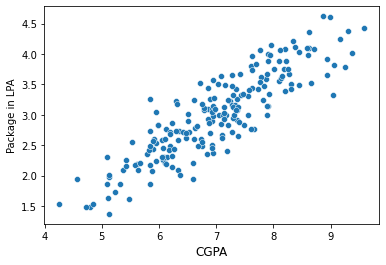

In [4]:
sns.scatterplot(df['cgpa'], df['package'])
plt.xlabel("CGPA", size=12)
plt.ylabel("Package in LPA")
plt.show()

In [5]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
X_train

,cgpa
137,7.14
163,8.93
111,5.42
123,5.10
109,7.77
...,...
43,7.66
22,6.14
72,7.78
15,7.25


In [9]:
y_train

137    3.13
163    3.91
111    2.25
123    2.30
109    4.06
       ... 
43     2.76
22     2.30
72     3.62
15     3.23
168    3.52
Name: package, Length: 160, dtype: float64

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(X_train, y_train)

LinearRegression()

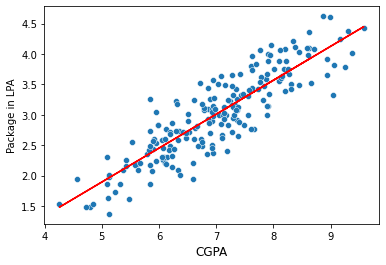

In [13]:
sns.scatterplot(df['cgpa'], df['package'])
plt.plot(X_train, lr.predict(X_train), color='r')
plt.xlabel("CGPA", size=12)
plt.ylabel("Package in LPA")
plt.show()

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [15]:
y_pred = lr.predict(X_test)
y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [16]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [17]:
print("MAE is: ",mean_absolute_error(y_test,y_pred)) # in LPA (lakh per anum)

MAE is:  0.2884710931878175


In [18]:
print("MSE is: ",mean_squared_error(y_test,y_pred)) # not in LPA

MSE is:  0.12129235313495527


In [19]:
print("RMAE is: ",np.sqrt(mean_squared_error(y_test,y_pred))) # in LPA

RMAE is:  0.34827051717731616


In [20]:
print("R2 Score is: ",r2_score(y_test, y_pred)) # it shows the accuracy of model
R2 = r2_score(y_test, y_pred)

R2 Score is:  0.780730147510384


In [21]:
# Adjusted R2 score
X_test.shape

(40, 1)

In [22]:
1 - ((1-R2)*(40-1)/(40-1-1))

0.7749598882343415

In [23]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.574816,3.26
1,5.12,0.966353,1.98
2,7.82,0.079314,3.25
3,7.42,0.874598,3.67
4,6.94,0.451572,3.57


Text(0, 0.5, 'Package(in lpa)')

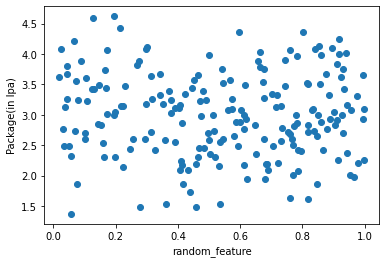

In [24]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [25]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [27]:
lr = LinearRegression()

In [28]:
lr.fit(X_train,y_train)

LinearRegression()

In [29]:
y_pred = lr.predict(X_test)

In [30]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7867096578975902


In [31]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7751804502163788

In [32]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [33]:
new_df2.sample(5)

,cgpa,iq,package
160,7.13,2.43,2.93
6,6.73,2.70,2.60
39,7.43,3.73,3.33
127,6.78,2.61,3.11
136,5.64,2.90,2.10


Text(0, 0.5, 'Package(in lpa)')

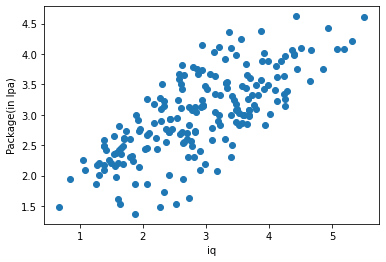

In [34]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [41]:
np.random.randint(-100,100)

84

In [36]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [38]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [39]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8288142914153973


In [40]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.8195610098702837